
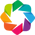

In [2]:
### WORK IN PROGRESS ... 

# first, install holoviews package through the following command line: 
# conda install -c ioam holoviews bokeh

# then, initiate this notebook with:
# jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000

# ----------------
# compute and plot the dynamic functional connectivity with use of holoviews package:
# http://holoviews.org/getting_started/index.html

import holoviews as hv
import numpy as np
hv.extension('bokeh')

import os

import pandas as pd
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
from sklearn.covariance import GraphLassoCV
from sklearn.metrics import mutual_info_score
from mpl_toolkits.axes_grid1 import make_axes_locatable
from __future__ import division

In [3]:
## Creates a 3D interactive map of FC matrices with one slider (window number):

def dFC_map(dynamic_corr_mat, Nwindows, RangeColorMap, label):
    """
    Returns a 3D interactive map of FC matrices with one slider (window number):
    
    """    
    items_fc = {} 
    for n in range(Nwindows): # a slider: window number
            def get_image3D(mat, label, n):
                mat = mat[n, :, :]
                return hv.Image(mat, label=label, bounds=[0,0,Nvars,Nvars],
                     kdims=['ROIs', 'ROIs'], 
                     vdims=[hv.Dimension('bla', range= RangeColorMap)])

            image_frame = get_image3D(dynamic_corr_mat, label, n)
            items_fc[n] = image_frame  

    dFCmap = hv.HoloMap(items_fc, kdims=['window number'])
    return dFCmap

In [4]:
## Creates a 3D interactive map of FC histograms with one slider (window number):

def dFC_hist(dynamic_corr_mat, Nwindows, label, Nbins):
    """
    Returns a 3D interactive map of the correlation-matrix FC histograms with one slider (window number)
    
    """
    items_fc = {} 
    for n in range(Nwindows): # a slider: window number
            def get_hist3D(mat, label, n):
                mat = mat[n, :, :]
                return hv.Histogram(np.histogram(mat.flatten()[~np.isnan(mat.flatten())], Nbins), kdims="r", label = label)
            
            image_frame = get_hist3D(dynamic_corr_mat, label, n)
            items_fc[n] = image_frame  

    histmap = hv.HoloMap(items_fc, kdims=['window number'])
    return histmap

In [5]:
###  Creates a 3D interactive map of cicular connectivity plots: with one slider (window number):

def dFC_circularconn(dynamic_corr_mat, Nwindows, Nvars, VarLabels, label, Ncon):
    """
    Returns a 3D interactive map of cicular connectivity plots: with one slider (window number)
    Plots the Ncon (an input number) of strongest connections (abs(corr)))
    ----
    
    Ncon -> Number of connections to plot (the Ncon strongest ones)
    """    
    items_fc = {} 
    for n in range(Nwindows): # a slider: window number
            def get_circular3D(mat, label, n, Nvars, VarLabels, Ncon):

                mat_tri = np.tril(mat[n,:,:]) # keeps only the lower half (tri) of the input matrix
                mat_flat = abs(mat_tri.flatten()) # matrix to flat array
                mat_sorted = np.sort(mat_flat)[::-1] # sorts the flat array (high to low)
                mat_sorted_below1 = mat_sorted[(mat_sorted<0.99999999)]
                #mat_sorted = np.setdiff1d(np.sort(mat_flat),[0,1])[::-1] # np.sort: sorts the matix values (low to high); np.setdiff1d(mat,[0,1]) keeps the values different from 0 or 1; [::-1]: sorts the array from high to low 
                mat_indices = np.where((mat_flat >= mat_sorted_below1[Ncon-1]) & (mat_flat > 0))  # indices for Ncon strongest connections in the flattened array
                rows, cols = np.unravel_index(mat_indices, mat_tri.shape) # indices of the variables with the Ncon strongest connections

                source = rows.T
                target = cols.T
                padding = dict(x=(-1.2, 1.2), y=(-1.2, 1.2))

                temporary_graph = hv.Graph(((source, target),),).redim.range(**padding)
                
                # Adding labels to the nodes
                node_indices = np.arange(Nvars)
                node_labels = VarLabels
                x, y = temporary_graph.nodes.array([0, 1]).T
                nodes = hv.Nodes((x, y, node_indices, node_labels), vdims='Label')

                return hv.Graph(((source, target),nodes),).redim.range(**padding)


            image_frame = get_circular3D(dynamic_corr_mat, label, n, Nvars, VarLabels, Ncon)
            items_fc[n] = image_frame  

    dFC_circular = hv.HoloMap(items_fc, kdims=['window number'])
    return dFC_circular



''' NOTES:
Still need to check if the paths could be "nicer-looking", and if some colours could be added to reflect the 
strenght of the connectios.


Some references:
http://holoviews.org/reference/elements/bokeh/Graph.html
http://holoviews.org/user_guide/Network_Graphs.html

'''

' NOTES:\nStill need to check if the paths could be "nicer-looking", and if some colours could be added to reflect the \nstrenght of the connectios.\n\n\nSome references:\nhttp://holoviews.org/reference/elements/bokeh/Graph.html\nhttp://holoviews.org/user_guide/Network_Graphs.html\n\n'

# [1] fMRI 

In [ ]:
# load the fMRI data (resting state, day 1):

## You should select a day and subject number (to access the corresponidng file)

Select_day = 1 #  1 -> resting state day 1, 2 -> resting state day 2
SUBJECT_NUMBER = 1 # Number between 1 and 100

# Loads the desired file:
if Select_day == 1:
    
    file_list_fMRI_day1 = os.listdir("../datasets/fMRI/HCP_parcellated_smoothing5_100subjects_Glasser_restingstate_day1/")
    print(file_list_fMRI_day1[SUBJECT_NUMBER-1])

    file2load = "../datasets/fMRI/HCP_parcellated_smoothing5_100subjects_Glasser_restingstate_day1/" + file_list_fMRI_day1[SUBJECT_NUMBER-1]
    print(file2load)
     
elif Select_day == 2:

    file_list_fMRI_day2 = os.listdir("../datasets/fMRI/HCP_parcellated_smoothing5_100subjects_Glasser_restingstate_day2/")
    print(file_list_fMRI_day2[SUBJECT_NUMBER-1])

    file2load = "../datasets/fMRI/HCP_parcellated_smoothing5_100subjects_Glasser_restingstate_day2/" + file_list_fMRI_day2[SUBJECT_NUMBER-1]
    print(file2load)

else:
    print("Select_day should be either 1 or 2")


labels_Glasser  = pd.read_csv("../datasets/fMRI/labels_Glasser.csv",header=None)[0].tolist()
df1 = pd.read_csv(file2load, header= None, names = labels_Glasser)
data           = df1.values
data1           = df1.values[0:600,:] #(I need to shorten the dataset a little bt as it is too large for plotting dFC)
Nvars           = data.shape[1]
T               = data.shape[0]
VarLabels = labels_Glasser

print("Nvars:", Nvars, ";", "T:", T)

In [ ]:
## Calculating dFC

# define the window size:
window_length   = 2380 # define window length as a number or as a fraction of the data length
# dynamic functional connectivity through a sliding window:
Nwindows = T - window_length + 1

dynamic_corrs = np.zeros((Nwindows,Nvars,Nvars))
for ind in range(Nwindows):
    frame = data[ind:ind + window_length, :]   
    dynamic_corrs[ind, :, :] = np.corrcoef(np.transpose(frame))

    
## Calculating static FC  

static_corrs = np.zeros((Nwindows,Nvars,Nvars))
for ind in range(Nwindows):
    #frame = data[ind:ind + window_length, :]   
    static_corrs[ind, :, :] = np.corrcoef(np.transpose(data))

    
'''
THE STATIC FC WAS KEPT IN THIS WAY (A MATRIX WITH EXACTLY THE SAME RESULT FOR MULTIPLES WINDOWS) 
TO ALLOW SIMULTANEOUS PLOTTING OF THE STATIC VS DYNAMIC FCs...
HOWEVER, THIS IS NOT COMPUTATIONALLY EFFICIENT AND WILL PROBABLY BE CHANGED)
'''    

In [ ]:
# Creates tuple of tuples with labels for the correlation matrix:
labelsx = ()
labelsy = ()
for ind in range(Nvars):
    labelsx = labelsx + ((ind, VarLabels[ind]),)
    labelsy = labelsy + ((Nvars-ind, VarLabels[ind]),)

xticks = labelsx
yticks = labelsy 

In [ ]:
# Plots the output

print("Nvars:", Nvars, ";", "T:", T, ";", "Nwindows:", Nwindows, ";", "window_length:", window_length, )
print(file2load)


%output size=500 max_frames=5000 
#%opts Histogram [width=400 height=200]
%opts Image [height=100 width=100]
%opts Image (cmap='RdBu_r') [colorbar=True invert_yaxis=False xticks=xticks yticks=yticks xrotation=90]  
%opts Graph [width=100 height=75 xaxis=None yaxis=None]
%opts Histogram [width=100 height=50]

map1 = dFC_map(static_corrs, Nwindows, (-0.5,0.5), 'static FC, rectangular window') ## SPECIFY the range of the colour map
map2 = dFC_hist(static_corrs, Nwindows, 'Histogram, static FC, rectangular window', 100) ## SPECIFY the Number of bins
map3 = dFC_circularconn(static_corrs, Nwindows, Nvars, VarLabels, 'dynamic FC, rectangular window', Ncon=50) ## SPECIFY Ncon

map4 = dFC_map(dynamic_corrs, Nwindows, (-0.5,0.5), 'dynamic FC, rectangular window') ## SPECIFY the range of the colour map
map5 = dFC_hist(dynamic_corrs, Nwindows, 'Histogram, dynamic FC, rectangular window', 100) ## SPECIFY the Number of bins
map6 = dFC_circularconn(dynamic_corrs, Nwindows, Nvars, VarLabels, 'dynamic FC, rectangular window', Ncon=50) ## SPECIFY Ncon



layout = hv.Layout(map1 + map4 + map2 + map5 + map3 + map6, 'scale_both').cols(2)
layout


# [2] MEG

In [ ]:
# Load the MEG data:

# 36 Subjects, sampling rate 2034.5 Hz, downsampled to 508.63Hz, 6 min long sessions, chopped to 2 sec long epochs (1,018 timepoints each). 
# 248 MEG channels, 23 reference. 
# First 5 epochs per subject are in the .csv files.

SUBJECT_NUMBER = 1 # Number between 1 and 36
EPOCH_NUMBER = 1 # Number between 1 and 5

file_list_MEG = os.listdir("../datasets/MEG/")
print(file_list_MEG[SUBJECT_NUMBER-1])

subject2load = "../datasets/MEG/" + file_list_MEG[SUBJECT_NUMBER-1]
print(subject2load)


df1 = pd.read_csv(subject2load) # timepoints x electrodes
#data           = df1.values
#data           = df1.values[0:1018,:] # first epoch
data           = df1.values[1018*(EPOCH_NUMBER-1) : 1018 + 1018*(EPOCH_NUMBER-1),:] 
Nvars           = data.shape[1]
T               = data.shape[0]

print("Nvars:", Nvars, ";", "T:", T)

#Removing the "[" and "]" from the names of the first and last electrode (maybe not really necessary)
#df1.axes[1][0].strip('[')
#df1.axes[1][Nvars-1].strip('] ')

#for x in range(0,Nvars-1):
#    df1.axes[1][x]= df1.axes[1][x].strip('[] ')

#Labels
labels_MEG = df1.axes[1].tolist()
VarLabels = labels_MEG

In [ ]:
## Calculating dFC

# define the window size:
window_length   = 1000 # define window length as a number or as a fraction of the data length
# dynamic functional connectivity through a sliding window:
Nwindows = T - window_length + 1

dynamic_corrs = np.zeros((Nwindows,Nvars,Nvars))
for ind in range(Nwindows):
    frame = data[ind:ind + window_length, :]   
    dynamic_corrs[ind, :, :] = np.corrcoef(np.transpose(frame))

    
## Calculating static FC

static_corrs = np.zeros((Nwindows,Nvars,Nvars))
for ind in range(Nwindows):
    #frame = data[ind:ind + window_length, :]   
    static_corrs[ind, :, :] = np.corrcoef(np.transpose(data))

In [ ]:
# Creates tuple of tuples with labels for the correlation matrix:
labelsx = ()
labelsy = ()
for ind in range(Nvars):
    labelsx = labelsx + ((ind, VarLabels[ind]),)
    labelsy = labelsy + ((Nvars-ind, VarLabels[ind]),)

xticks = labelsx
yticks = labelsy 

In [ ]:
# Plots the output

print("Nvars:", Nvars, ";", "T:", T, ";", "Nwindows:", Nwindows, ";", "window_length:", window_length, )
print(subject2load)
print("Epoch:", EPOCH_NUMBER)

%output size=500 max_frames=5000 
#%opts Histogram [width=400 height=200]
%opts Image [height=100 width=100]
%opts Image (cmap='RdBu_r') [colorbar=True invert_yaxis=False xticks=xticks yticks=yticks xrotation=90]  
%opts Graph [width=100 height=75 xaxis=None yaxis=None]
%opts Histogram [width=100 height=50]

map1 = dFC_map(static_corrs, Nwindows, (-1,1), 'static FC, rectangular window')
map2 = dFC_hist(static_corrs, Nwindows, 'Histogram, static FC, rectangular window', 100)
map3 = dFC_circularconn(static_corrs, Nwindows, Nvars, VarLabels, 'dynamic FC, rectangular window', Ncon=50)

map4 = dFC_map(dynamic_corrs, Nwindows, (-1,1), 'dynamic FC, rectangular window')
map5 = dFC_hist(dynamic_corrs, Nwindows, 'Histogram, dynamic FC, rectangular window', 100)
map6 = dFC_circularconn(dynamic_corrs, Nwindows, Nvars, VarLabels, 'dynamic FC, rectangular window', Ncon=50)



layout = hv.Layout(map1 + map4 + map2 + map5 + map3 + map6, 'scale_both').cols(2)
layout

# [3] mRNA

In [6]:
# Load the mRNA data:
# A1BG-AS1, A2M  -> genes whose expression is measured over time
# sub002, sub007 -> subsequent measurements (samples) in one and the same person. RNA integrity number (RIN) was measured for each sample. 

df      = pd.read_csv("../datasets/myconnectome/rna-seq/varstab_data_prefiltered.csv", sep = " ") #variables (13844) x timepoints (48)
df1 = df.T # transposing the df, so the variables are in the columns
#data1           = df1.values
data           = df1.values[:,0:48] #checking only the first 48 variables
Nvars           = data.shape[1] 
T               = data.shape[0]
print("Genes:" + str(data.shape[0]) + " ; Measurements(samples):" + str(data.shape[1]))

# Labels
labels_mRNA = df.index.tolist()[0:48]
VarLabels = labels_mRNA

Genes:48 ; Measurements(samples):48


In [7]:
## Calculating dFC

# define the window size:
window_length   = 10 # define window length as a number or as a fraction of the data length
# dynamic functional connectivity through a sliding window:
Nwindows = T - window_length + 1

dynamic_corrs = np.zeros((Nwindows,Nvars,Nvars))
for ind in range(Nwindows):
    frame = data[ind:ind + window_length, :]   
    dynamic_corrs[ind, :, :] = np.corrcoef(np.transpose(frame))

    
## Calculating static FC

static_corrs = np.zeros((Nwindows,Nvars,Nvars))
for ind in range(Nwindows):
    #frame = data[ind:ind + window_length, :]   
    static_corrs[ind, :, :] = np.corrcoef(np.transpose(data))

In [8]:
# Creates tuple of tuples with labels for the correlation matrix:
labelsx = ()
labelsy = ()
for ind in range(Nvars):
    labelsx = labelsx + ((ind, VarLabels[ind]),)
    labelsy = labelsy + ((Nvars-ind, VarLabels[ind]),)

xticks = labelsx
yticks = labelsy 

In [9]:
# Plots the output

print("Nvars:", Nvars, ";", "T:", T, ";", "Nwindows:", Nwindows, ";", "window_length:", window_length, )

%output size=500 max_frames=5000 
#%opts Histogram [width=400 height=200]
%opts Image [height=100 width=100]
%opts Image (cmap='RdBu_r') [colorbar=True invert_yaxis=False xticks=xticks yticks=yticks xrotation=90]  
%opts Graph [width=100 height=75 xaxis=None yaxis=None]
%opts Histogram [width=100 height=50]

map1 = dFC_map(static_corrs, Nwindows, (-1,1), 'static FC, rectangular window')
map2 = dFC_hist(static_corrs, Nwindows, 'Histogram, static FC, rectangular window', 100)
map3 = dFC_circularconn(static_corrs, Nwindows, Nvars, VarLabels, 'dynamic FC, rectangular window', Ncon=15)

map4 = dFC_map(dynamic_corrs, Nwindows, (-1,1), 'dynamic FC, rectangular window')
map5 = dFC_hist(dynamic_corrs, Nwindows, 'Histogram, dynamic FC, rectangular window', 100)
map6 = dFC_circularconn(dynamic_corrs, Nwindows, Nvars, VarLabels, 'dynamic FC, rectangular window', Ncon=15)



layout = hv.Layout(map1 + map4 + map2 + map5 + map3 + map6, 'scale_both').cols(2)
layout

Nvars: 48 ; T: 48 ; Nwindows: 39 ; window_length: 10


:Layout
   .HoloMap.Static_FC_comma_rectangular_window                  :HoloMap   [window number]
      :Image   [ROIs,ROIs]   (bla)
   .HoloMap.Dynamic_FC_comma_rectangular_window                 :HoloMap   [window number]
      :Image   [ROIs,ROIs]   (bla)
   .HoloMap.Histogram_comma_static_FC_comma_rectangular_window  :HoloMap   [window number]
      :Histogram   [r]   (Frequency)
   .HoloMap.Histogram_comma_dynamic_FC_comma_rectangular_window :HoloMap   [window number]
      :Histogram   [r]   (Frequency)
   .HoloMap.I                                                   :HoloMap   [window number]
      :Graph   [start,end]
   .HoloMap.II                                                  :HoloMap   [window number]
      :Graph   [start,end]

# [4] Google trends

In [ ]:
# Load the Google trends data:

# summary statistics, past 5 years, weekly basis (260 datapoints in total).
# normalized 0-100, 100 is the peak over 5-years. 
# 34 search terms (politics, economy, education, life qualities). 
# time course of the popularity of search terms belonged to four categories: regular rhythm, peaking at a particular event, irregular and drifting.
df1 = pd.read_csv("../datasets/google_trends/googletrends_allphrases_5years.csv", sep = ";", index_col = ["Week"]) # weeks(260) x items(34)
data           = df1.values
#data1           = df1.values[0:260,:]
Nvars           = data.shape[1]
T               = data.shape[0]
# Labels
labels_Google = df1.axes[1].tolist()
VarLabels = labels_Google


In [ ]:
## Calculating dFC

# define the window size:
window_length   = 106 # define window length as a number or as a fraction of the data length
# It seems that at least one of the variables has a constant value for 105 timepoints (so, that window length or a smaller one causes an error)

#https://stackoverflow.com/questions/45897003/python-numpy-corrcoef-runtimewarning-invalid-value-encountered-in-true-divide
'''
Correlation is a measure of how well two vectors track with each other as they change. 
You can't track mutual change when one vector doesn't change.
As noted in OP comments, the formula for Pearson's product-moment correlation coefficient divides the 
covariance of X and Y by the product of their standard deviations. Since Y has zero variance in your example, 
its standard deviation is also zero. That's why you get the true_divide error - you're trying to divide by zero.
'''

# dynamic functional connectivity through a sliding window:
Nwindows = T - window_length + 1

print("Nvars:", Nvars, ";", "T:", T, ";", "Nwindows:", Nwindows, ";", "window_length:", window_length, )


dynamic_corrs = np.zeros((Nwindows,Nvars,Nvars))
for ind in range(Nwindows):
    frame = data[ind:ind + window_length, :]   
    dynamic_corrs[ind, :, :] = np.corrcoef(np.transpose(frame))

    
## Calculating static FC

static_corrs = np.zeros((Nwindows,Nvars,Nvars))
for ind in range(Nwindows):
    #frame = data[ind:ind + window_length, :]   
    static_corrs[ind, :, :] = np.corrcoef(np.transpose(data))

In [ ]:
# Creates tuple of tuples with labels for the correlation matrix:
labelsx = ()
labelsy = ()
for ind in range(Nvars):
    labelsx = labelsx + ((ind, VarLabels[ind]),)
    labelsy = labelsy + ((Nvars-ind, VarLabels[ind]),)

xticks = labelsx
yticks = labelsy 

In [ ]:
# Plots the output

print("Nvars:", Nvars, ";", "T:", T, ";", "Nwindows:", Nwindows, ";", "window_length:", window_length, )

%output size=500 max_frames=5000 
#%opts Histogram [width=400 height=200]
%opts Image [height=100 width=100]
%opts Image (cmap='RdBu_r') [colorbar=True invert_yaxis=False xticks=xticks yticks=yticks xrotation=90]  
%opts Graph [width=100 height=75 xaxis=None yaxis=None]
%opts Histogram [width=100 height=50]

map1 = dFC_map(static_corrs, Nwindows, (-1,1), 'static FC, rectangular window')
map2 = dFC_hist(static_corrs, Nwindows, 'Histogram, static FC, rectangular window', 100)
map3 = dFC_circularconn(static_corrs, Nwindows, Nvars, VarLabels, 'dynamic FC, rectangular window', Ncon=15)

map4 = dFC_map(dynamic_corrs, Nwindows, (-1,1), 'dynamic FC, rectangular window')
map5 = dFC_hist(dynamic_corrs, Nwindows, 'Histogram, dynamic FC, rectangular window', 100)
map6 = dFC_circularconn(dynamic_corrs, Nwindows, Nvars, VarLabels, 'dynamic FC, rectangular window', Ncon=15)



layout = hv.Layout(map1 + map4 + map2 + map5 + map3 + map6, 'scale_both').cols(2)
layout


# [5] Stock exchange

In [ ]:
# Load the Stock exchange data:

# 96 stocks companies 
# the closing daily price was used for the analysis (6,040 datapoints per company, around 24 years of stock market price dynamics). 
# The data has been detrended by using log-returns

df1    = pd.read_csv("../datasets/stock_exchange/detrended-log.csv", index_col='date') # datapoints x companies
data           = df1.values
#data1           = df1.values[0:260,:]
Nvars           = data.shape[1]
T               = data.shape[0]
labels_Stock = df1.axes[1].tolist()
VarLabels = labels_Stock


In [ ]:
## Calculating dFC

# define the window size:
window_length   = 5800 # define window length as a number or as a fraction of the data length
# dynamic functional connectivity through a sliding window:
Nwindows = T - window_length + 1

print("Nvars:", Nvars, ";", "T:", T, ";", "Nwindows:", Nwindows, ";", "window_length:", window_length, )


dynamic_corrs = np.zeros((Nwindows,Nvars,Nvars))
for ind in range(Nwindows):
    frame = data[ind:ind + window_length, :]   
    dynamic_corrs[ind, :, :] = np.corrcoef(np.transpose(frame))

    
## Calculating static FC

static_corrs = np.zeros((Nwindows,Nvars,Nvars))
for ind in range(Nwindows):
    #frame = data[ind:ind + window_length, :]   
    static_corrs[ind, :, :] = np.corrcoef(np.transpose(data))

In [ ]:
# Creates tuple of tuples with labels for the correlation matrix:
labelsx = ()
labelsy = ()
for ind in range(Nvars):
    labelsx = labelsx + ((ind, VarLabels[ind]),)
    labelsy = labelsy + ((Nvars-ind, VarLabels[ind]),)

xticks = labelsx
yticks = labelsy 

In [ ]:
# Plots the output

print("Nvars:", Nvars, ";", "T:", T, ";", "Nwindows:", Nwindows, ";", "window_length:", window_length, )

%output size=500 max_frames=5000 
#%opts Histogram [width=400 height=200]
%opts Image [height=100 width=100]
%opts Image (cmap='RdBu_r') [colorbar=True invert_yaxis=False xticks=xticks yticks=yticks xrotation=90]  
%opts Graph [width=100 height=75 xaxis=None yaxis=None]
%opts Histogram [width=100 height=50]

map1 = dFC_map(static_corrs, Nwindows, (-0.5,0.5), 'static FC, rectangular window')
map2 = dFC_hist(static_corrs, Nwindows, 'Histogram, static FC, rectangular window', 100)
map3 = dFC_circularconn(static_corrs, Nwindows, Nvars, VarLabels, 'dynamic FC, rectangular window', Ncon=15)

map4 = dFC_map(dynamic_corrs, Nwindows, (-0.5,0.5), 'dynamic FC, rectangular window')
map5 = dFC_hist(dynamic_corrs, Nwindows, 'Histogram, dynamic FC, rectangular window', 100)
map6 = dFC_circularconn(dynamic_corrs, Nwindows, Nvars, VarLabels, 'dynamic FC, rectangular window', Ncon=15)



layout = hv.Layout(map1 + map4 + map2 + map5 + map3 + map6, 'scale_both').cols(2)
layout


# [6] Weather

In [ ]:
# Load the Weather data by airport (timepoints x variables) (correlate weather within each airport)
# OR
# Load the Weather data by variable (timepoints x airports) (correlate timeseries between airports)

# Select if you want to analyse the Airport files or the Variables files:
Select_Airport_or_Variable = 2 #  1 -> Airport, 2 -> Variable

# Select the Airport or Variable number you want to analyse:
AIRPORT_NUMBER = 1 # This should be a number from 1 to 9
VARIABLE_NUMBER = 1 # This should be a number from 1 to 13


# Loads the desired file:
if Select_Airport_or_Variable == 1:
    
    file_list_weather_by_airport = os.listdir("../datasets/weather/data_by_airport/") # number from 1 to 9
    print(file_list_weather_by_airport[AIRPORT_NUMBER-1])

    file2load = "../datasets/weather/data_by_airport/" + file_list_weather_by_airport[AIRPORT_NUMBER-1]
    print(file2load)
    
    df1 = pd.read_csv(file2load, sep = ";", index_col = ["Station", "Name", "Date"]) # timepoints x variables
    
elif Select_Airport_or_Variable == 2:

    file_list_weather_by_variable = os.listdir("../datasets/weather/data_by_variable/") # number from 1 to 9
    print(file_list_weather_by_variable[VARIABLE_NUMBER-1])

    file2load = "../datasets/weather/data_by_variable/" + file_list_weather_by_variable[VARIABLE_NUMBER-1]
    print(file2load)
    
    df1 = pd.read_csv(file2load, sep = ";", index_col = "Date") # timepoints x airports

else:
    print("Select_Airport_or_Variable should be either 1 (for airports) or 2 (for variables)")


# One-year daily summary reports (between January 20th, 2017 and January 16th, 2018) from 9 Californian airports
data           = df1.values
#data1           = df1.values[0:260,:]
Nvars           = data.shape[1]
T               = data.shape[0]
# Labels
labels_Weather = df1.axes[1].tolist()
VarLabels = labels_Weather
print("Nvars:", Nvars, ";", "T:", T)


In [ ]:
## Calculating dFC

# define the window size:
window_length   = 300 # define window length as a number or as a fraction of the data length
# dynamic functional connectivity through a sliding window:
Nwindows = T - window_length + 1

print("Nvars:", Nvars, ";", "T:", T, ";", "Nwindows:", Nwindows, ";", "window_length:", window_length, )


dynamic_corrs = np.zeros((Nwindows,Nvars,Nvars))
for ind in range(Nwindows):
    frame = data[ind:ind + window_length, :]   
    dynamic_corrs[ind, :, :] = np.corrcoef(np.transpose(frame))

    
## Calculating static FC

static_corrs = np.zeros((Nwindows,Nvars,Nvars))
for ind in range(Nwindows):
    #frame = data[ind:ind + window_length, :]   
    static_corrs[ind, :, :] = np.corrcoef(np.transpose(data))

In [ ]:
# Creates tuple of tuples with labels for the correlation matrix:
labelsx = ()
labelsy = ()
for ind in range(Nvars):
    labelsx = labelsx + ((ind, VarLabels[ind]),)
    labelsy = labelsy + ((Nvars-ind, VarLabels[ind]),)

xticks = labelsx
yticks = labelsy 

In [ ]:
# Plots the output

print("Nvars:", Nvars, ";", "T:", T, ";", "Nwindows:", Nwindows, ";", "window_length:", window_length, )
print(file2load)

%output size=500 max_frames=5000 
#%opts Histogram [width=400 height=200]
%opts Image [height=100 width=100]
%opts Image (cmap='RdBu_r') [colorbar=True invert_yaxis=False xticks=xticks yticks=yticks xrotation=90]  
%opts Graph [width=100 height=75 xaxis=None yaxis=None]
%opts Histogram [width=100 height=50]

map1 = dFC_map(static_corrs, Nwindows, (-1,1), 'static FC, rectangular window')
map2 = dFC_hist(static_corrs, Nwindows, 'Histogram, static FC, rectangular window', 10)
map3 = dFC_circularconn(static_corrs, Nwindows, Nvars, VarLabels, 'dynamic FC, rectangular window', Ncon=5)

map4 = dFC_map(dynamic_corrs, Nwindows, (-1,1), 'dynamic FC, rectangular window')
map5 = dFC_hist(dynamic_corrs, Nwindows, 'Histogram, dynamic FC, rectangular window', 10)
map6 = dFC_circularconn(dynamic_corrs, Nwindows, Nvars, VarLabels, 'dynamic FC, rectangular window', Ncon=5)



layout = hv.Layout(map1 + map4 + map2 + map5 + map3 + map6, 'scale_both').cols(2)
layout